In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import BayesianGaussianMixture

In [2]:
from get_data import gmm_playlists_to_csv
gmm_playlists_to_csv('bornofawesomeness')

### edit above lines if moodify is running and you wish to
### use someone else's data

'data.csv updated for the user bornofawesomeness'

## Goals:
- Explore how the metadata is reflected with the playlists
- Further user statistics with features like popularity

In [3]:
df = pd.read_csv('data.csv')
df

,track_id,track_name,popularity,playlist_id,danceability,energy,acousticness,valence,tempo
0,2OXK1ShksXD51tOLsE0E7s,Tidal Wave,49,0,0.532,0.868,0.050200,0.5090,173.948
1,6pazDyDn0XF0te3wSjozhC,Hold On - Sub Focus Remix,0,0,0.382,0.928,0.006760,0.0571,173.975
2,3eKoLbxkNhAINXr22jjv7E,Cutting Through,36,0,0.389,0.868,0.000013,0.2300,175.071
3,1eJ8OO6hINoaczlMkQri9I,Mind Games,27,0,0.504,0.917,0.079600,0.3410,174.016
4,0COqiPhxzoWICwFCS4eZcp,Bring Me To Life,71,0,0.316,0.945,0.008950,0.3030,189.931
5,0Z99qIN6Vur4XDCI6ez7A2,Lost in the Future,0,0,0.397,0.865,0.005130,0.2250,173.954
6,29mwaZVWzTiVgou4ghU1xT,Dusk to Dawn,0,0,0.497,0.851,0.000298,0.2610,175.004
7,3xcv3R9LGJkprp0EOQvdNt,Everyday - Netsky Remix,4,0,0.327,0.933,0.000346,0.1020,173.920
8,1ti43ZT6bc4o1eGOSnBHkO,Speakerbox (feat. Lafa Taylor),62,0,0.507,0.934,0.009430,0.4720,175.954
9,0eYodayhfgKp2KZg42DpPo,Ice Cream Truck,25,0,0.376,0.803,0.000094,0.3690,180.038


In [4]:
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 9 columns):
track_id        732 non-null object
track_name      732 non-null object
popularity      732 non-null int64
playlist_id     732 non-null int64
danceability    732 non-null float64
energy          732 non-null float64
acousticness    732 non-null float64
valence         732 non-null float64
tempo           732 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 51.5+ KB


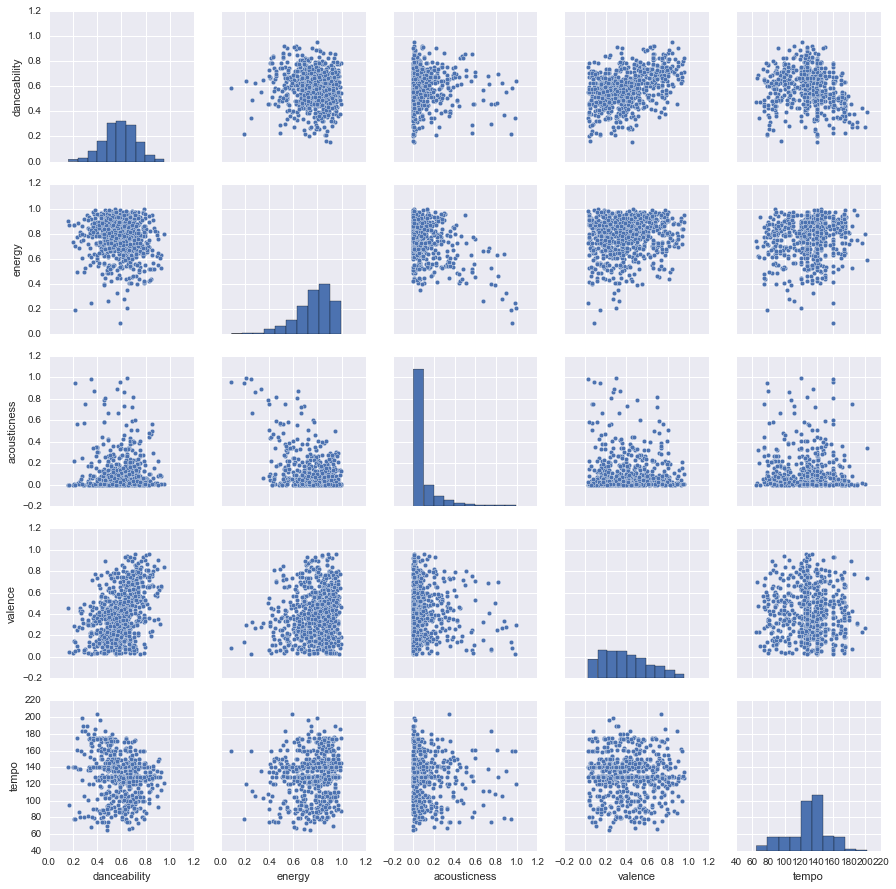

In [5]:
sns.pairplot(df[['danceability', 'energy', 'acousticness', 'valence', 'tempo']])

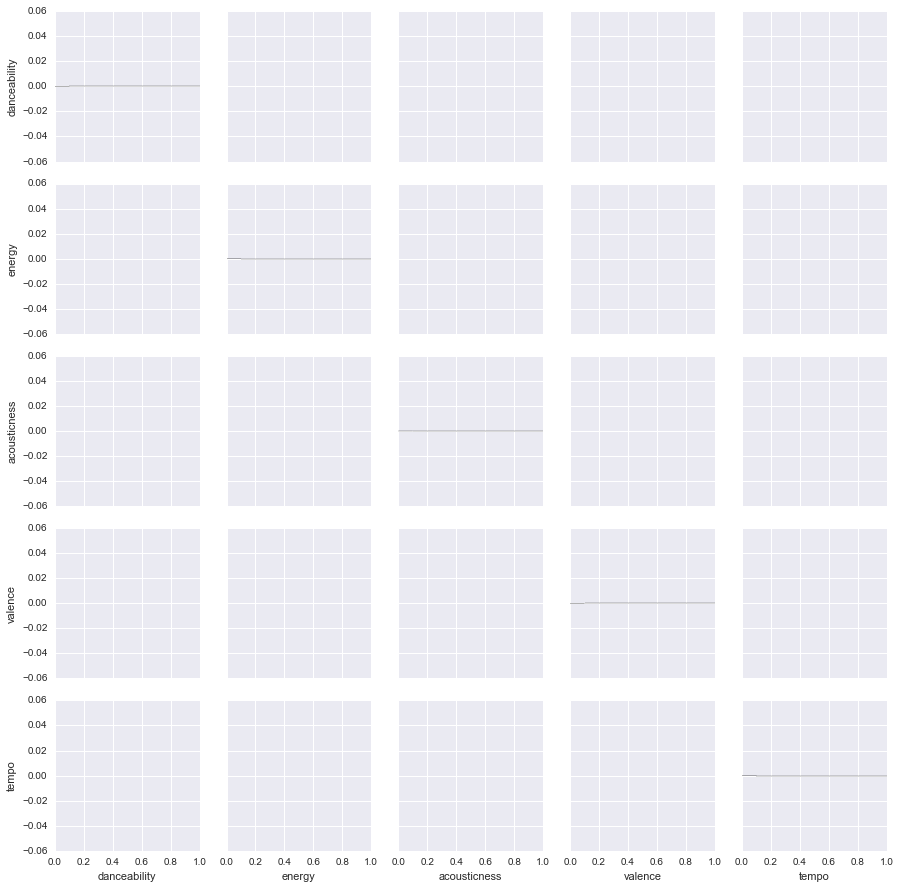

In [6]:
temp_df = df[df['playlist_id'] == 21]
sns.pairplot(temp_df[['danceability', 'energy', 'acousticness', 'valence', 'tempo']])

In [7]:
temp_df

,track_id,track_name,popularity,playlist_id,danceability,energy,acousticness,valence,tempo


In [8]:
data = df['tempo'].values
mean= data.mean()
result = df[(data > mean - 1) & (data < mean + 1)]
print(result.shape)
result

(30, 9)


,track_id,track_name,popularity,playlist_id,danceability,energy,acousticness,valence,tempo
175,5XmKJXidSzQC2aUk35oLyt,Count On Me,33,4,0.675,0.902,0.120000,0.592,129.959
183,6NdkzOSCLzmyV9Qc4DKhJ2,This Is What It Feels Like,61,4,0.551,0.827,0.109000,0.171,129.899
193,0wYVNC09iLBVIqHB07Hckt,Ecstasy,53,4,0.658,0.878,0.135000,0.908,130.009
218,40Fp6pxcS9l08kL1R50mR4,First Time,47,9,0.441,0.949,0.000044,0.447,130.817
237,20qsOjwLKHgY28t6CNTbMq,Ultra DJ's/Me & You - Spencer & Hill Remix,27,9,0.667,0.927,0.000346,0.666,129.990
258,0QwD6Dv9PdUKj2scIciAgu,River Flows in You - Dubstep Remix,28,11,0.740,0.642,0.242000,0.395,130.002
261,2HrYDWxXQKIvOvwS293bX4,Ride It,51,11,0.749,0.702,0.159000,0.357,130.051
265,5MeZ3VxmtSv1O8PcekvLTn,Boom Boom Pow,63,11,0.868,0.848,0.151000,0.345,130.115
313,2paLNiRPdyEiDa0es9kEsg,Twenty Eight,40,14,0.641,0.633,0.555000,0.235,129.969
341,2YfVXi6dTux0x8KkWeZdd3,Rain,48,17,0.516,0.545,0.146000,0.204,130.026


In [9]:
data = df['energy'].values
max_energy = data.max()
min_energy = data.min()
range_ = (max_energy - min_energy) * .1
result = df[(data > max_energy - range_) & (data <= max_energy)]
print(result.shape)
result

(130, 9)


,track_id,track_name,popularity,playlist_id,danceability,energy,acousticness,valence,tempo
1,6pazDyDn0XF0te3wSjozhC,Hold On - Sub Focus Remix,0,0,0.382,0.928,0.006760,0.0571,173.975
3,1eJ8OO6hINoaczlMkQri9I,Mind Games,27,0,0.504,0.917,0.079600,0.3410,174.016
4,0COqiPhxzoWICwFCS4eZcp,Bring Me To Life,71,0,0.316,0.945,0.008950,0.3030,189.931
7,3xcv3R9LGJkprp0EOQvdNt,Everyday - Netsky Remix,4,0,0.327,0.933,0.000346,0.1020,173.920
8,1ti43ZT6bc4o1eGOSnBHkO,Speakerbox (feat. Lafa Taylor),62,0,0.507,0.934,0.009430,0.4720,175.954
12,0wlG1xpRozHe3jmIzK5Nhm,Show You - Original Mix,19,0,0.488,0.926,0.016100,0.3460,174.992
13,5Vac8co5QPblcdlWbHSFsE,"Check Yes, Juliet",62,0,0.349,0.919,0.004150,0.2950,166.916
14,4gMIZhJUOCjmQxo1fwhhnK,My Eyes,38,0,0.376,0.954,0.000129,0.0340,174.045
17,5TtPEFYnYlzEbEsA5nHJYq,Run Riot - Sub Zero Remix,0,0,0.463,0.992,0.000221,0.1850,175.050
21,7s239LkPiOKM5XGxgiYQpr,Out The Blue - Radio Edit,34,0,0.413,0.948,0.007580,0.3420,174.067


In [10]:
data = df['danceability'].values
max_dance = data.max()
min_dance = data.min()
range_ = (max_dance - min_dance) * .1
result = df[(data > max_dance - range_) & (data <= max_dance)]
print(result.shape)
result

(12, 9)


,track_id,track_name,popularity,playlist_id,danceability,energy,acousticness,valence,tempo
172,18UhvUi9FjHtoTgnqX7kbl,Drop It Like It's Hot - Album Version (Edited),32,3,0.903,0.550,0.217000,0.647,92.009
399,2EDLxm55ESkYQ1h0Isfwdv,Fake Love,53,19,0.924,0.526,0.081600,0.655,133.972
400,7lXCT5xxTVOJAu11FOF8PS,By Your Side,0,19,0.914,0.624,0.086600,0.626,150.034
403,6nmz4imkDcmtwMjocAzFSx,Hotline Bling,25,19,0.896,0.623,0.002570,0.564,134.962
433,1pKYYY0dkg23sQQXi0Q5zN,Around The World,68,22,0.956,0.795,0.003560,0.840,121.294
442,7sm1xuahSGG5qFa9pFXWVs,Just Dance - RedOne Remix,41,22,0.893,0.812,0.003400,0.815,119.021
446,7n8eZAUj6vevNQZ0EF3OH0,Without Me,29,22,0.926,0.626,0.003010,0.663,112.246
450,6zlOUIqcU6juXFww9UNpJK,Five Hours,16,22,0.880,0.821,0.019700,0.576,127.907
454,5rb9QrpfcKFHM1EUbSIurX,Yeah!,77,22,0.894,0.791,0.018300,0.594,105.018
656,2Vyny7HMXDxIw4NqqkViAn,Cleanin' Out My Closet,27,34,0.907,0.756,0.081600,0.901,148.017


In [11]:
data = df['valence'].values
max_energy = data.max()
min_energy = data.min()
range_ = (max_energy - min_energy) * .9
result = df[(data > 0) & (data <= max_energy - range_)]
print(result.shape)
result

(77, 9)


,track_id,track_name,popularity,playlist_id,danceability,energy,acousticness,valence,tempo
1,6pazDyDn0XF0te3wSjozhC,Hold On - Sub Focus Remix,0,0,0.382,0.928,0.006760,0.0571,173.975
7,3xcv3R9LGJkprp0EOQvdNt,Everyday - Netsky Remix,4,0,0.327,0.933,0.000346,0.1020,173.920
14,4gMIZhJUOCjmQxo1fwhhnK,My Eyes,38,0,0.376,0.954,0.000129,0.0340,174.045
25,64I0O6ZipYryKte1cHA2EY,End Credits,37,0,0.231,0.770,0.010100,0.1050,175.064
43,28XFFzVPXs3kzXOERhz3wU,Turn Me On,28,2,0.477,0.846,0.007920,0.0786,139.999
44,6CY8FegdChgsMU2EhKkXPy,Raise Your Weapon,0,2,0.507,0.696,0.015500,0.0679,139.973
46,295nnPutAyvfXpVsfwJbga,Sweet Shop,36,2,0.592,0.886,0.004870,0.1050,139.913
56,42JC7XjdRGOVOKOZK4tvcX,Crave You - Adventure Club Remix,32,2,0.624,0.728,0.005400,0.1050,139.939
57,3gB0inHWfzACc0wjolOdpa,When I Look At You,0,2,0.547,0.737,0.000310,0.0390,140.331
59,2kDVDefTovXooa3OiLRR4H,Last Jungle,21,2,0.477,0.760,0.001520,0.0518,144.975
